# Load the Disaster Tweets
Let's have a look at the dataset.

They contain:
- id
- keyword: A keyword from that tweet (although this may be blank!)
- location: The location the tweet was sent from (may also be blank)
- text: The text of a tweet
- target: 1 if the tweet is a real disaster or 0 if not

In [46]:
import pandas as pd

In [47]:
url = 'https://raw.githubusercontent.com/Desmondonam/disaster_tweets_classification/main/Data/twitter_disaster.csv'

In [48]:
df = pd.read_csv(url)
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [49]:
# Explore teh datasets structure
print("Dataset Shape:", df.shape)
print("\nColumns and Data Types:")
print(df.dtypes)

Dataset Shape: (7613, 5)

Columns and Data Types:
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object


In [50]:
# Visualize the distribution of classes
class_distribution = df['target'].value_counts()
print("\nClass Distribution:")
print(class_distribution)


Class Distribution:
target
0    4342
1    3271
Name: count, dtype: int64


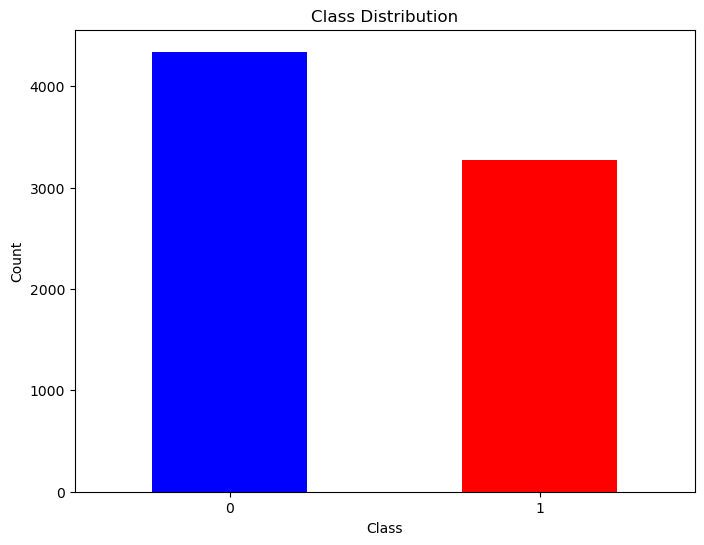

In [51]:
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [52]:
# Analyze the frequency of keywords and phrases associated with disaster tweets
disaster_tweets = df[df['target'] == 1]['text']
non_disaster_tweets = df[df['target'] == 0]['text']

In [53]:
# Function to get top N most common words
def get_top_n_words(corpus, n=None):
    from sklearn.feature_extraction.text import CountVectorizer
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [54]:
# Get top 20 most common words in disaster tweets
top_disaster_words = get_top_n_words(disaster_tweets, 20)
print("\nTop 20 words in disaster tweets:")
for word, freq in top_disaster_words:
    print(word, ":", freq)


Top 20 words in disaster tweets:
co : 2528
http : 2382
the : 1364
in : 1164
of : 928
to : 757
and : 506
on : 420
for : 401
is : 352
at : 308
by : 278
from : 245
it : 240
that : 210
with : 192
this : 182
fire : 182
after : 181
û_ : 172


In [55]:
# Get top 20 most common words in non-disaster tweets
top_non_disaster_words = get_top_n_words(non_disaster_tweets, 20)
print("\nTop 20 words in non-disaster tweets:")
for word, freq in top_non_disaster_words:
    print(word, ":", freq)


Top 20 words in non-disaster tweets:
co : 2212
http : 1927
the : 1913
to : 1192
and : 920
of : 902
in : 822
you : 757
is : 598
my : 546
it : 539
for : 493
on : 440
that : 413
with : 380
this : 298
be : 287
https : 277
me : 263
like : 254


In [56]:
# Load the libraries to prepare the data
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [57]:
# Function to clean text data
def clean_text(text):
    # Remove special characters, URLs, and punctuation marks
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and punctuation marks
    return text.lower()  # Convert text to lowercase

In [58]:
# Apply text cleaning to the 'text' column
df['clean_text'] = df['text'].apply(clean_text)

In [59]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
# Tokenize the text into individual words or tokens
df['tokens'] = df['clean_text'].apply(word_tokenize)

In [61]:
# Remove stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


In [62]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
# Lemmatize tokens
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [64]:
df['target']

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [65]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['target'], test_size=0.2, random_state=42)


In [66]:
# Display the first few rows of the preprocessed data
print("Preprocessed Data:")
print(df[['clean_text', 'tokens', 'target']].head())


Preprocessed Data:
                                          clean_text  \
0  our deeds are the reason of this earthquake ma...   
1              forest fire near la ronge sask canada   
2  all residents asked to shelter in place are be...   
3   people receive wildfires evacuation orders in...   
4  just got sent this photo from ruby alaska as s...   

                                              tokens  target  
0  [deed, reason, earthquake, may, allah, forgive...       1  
1      [forest, fire, near, la, ronge, sask, canada]       1  
2  [resident, asked, shelter, place, notified, of...       1  
3  [people, receive, wildfire, evacuation, order,...       1  
4  [got, sent, photo, ruby, alaska, smoke, wildfi...       1  


In [67]:
# Display the shape of training and testing sets
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (6090,) (6090,)
Testing set shape: (1523,) (1523,)


# Feature Engineering

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [69]:
# Tokenization, removing stopwords, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [70]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess_text)

In [71]:
# Feature Engineering: TF-IDF Scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_text'])

In [89]:
# Define the directory path to save the model
directory = 'models/'

In [90]:
# Save the TF-IDF vectorizer using joblib
joblib.dump(tfidf_vectorizer, directory + 'tfidf_vectorizer.joblib')

['models/tfidf_vectorizer.joblib']

In [72]:
# Additional Features
# Tweet Length
df['tweet_length'] = df['clean_text'].apply(len)

In [73]:
# Presence of Hashtags
df['hashtag_presence'] = df['clean_text'].apply(lambda x: 1 if '#' in x else 0)

In [74]:
# Presence of User Mentions
df['mention_presence'] = df['clean_text'].apply(lambda x: 1 if '@' in x else 0)

In [75]:
df['target']

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [76]:
# Combine TF-IDF features with additional features
tfidf_features = tfidf_features.toarray()
additional_features = df[['tweet_length', 'hashtag_presence', 'mention_presence']].values
X = np.hstack((tfidf_features, additional_features))
y = df['target'].values

In [77]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [78]:
# Check for missing values in the target variable (y)
missing_values = df['target'].isnull().sum()
missing_values

0

In [79]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# Display the shape of training and testing sets
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (6090, 13709) (6090,)
Testing set shape: (1523, 13709) (1523,)


# Model Evaluation and Training

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [82]:
# Candidate classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier()
}

In [83]:
from sklearn.impute import SimpleImputer

In [84]:
# Handle missing values in features (X)
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [85]:

# Train and evaluate each model
for model_name, model in models.items():
    print("Training", model_name)
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Evaluation Metrics for", model_name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()
    
    # Save the trained model
    joblib.dump(model, f"models/{model_name}.joblib")


Training Logistic Regression


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation Metrics for Logistic Regression
Accuracy: 0.8122127380170716
Precision: 0.8457142857142858
Recall: 0.6841294298921418
F1 Score: 0.7563884156729132

Training Random Forest
Evaluation Metrics for Random Forest
Accuracy: 0.793827971109652
Precision: 0.8439425051334702
Recall: 0.6332819722650231
F1 Score: 0.7235915492957746

Training Neural Network
Evaluation Metrics for Neural Network
Accuracy: 0.7426132632961261
Precision: 0.6903703703703704
Recall: 0.7180277349768875
F1 Score: 0.7039274924471299



In [86]:
# Hyperparameter optimization using GridSearchCV
param_grid = {
    "C": [0.1, 1, 10],
    "penalty": ["l1", "l2"]
}

In [87]:
logistic_regression = LogisticRegression()
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_search.best_params_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the selected model on the testing dataset
y_pred_test = model.predict(X_test_imputed)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Evaluation Metrics on Testing Dataset:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Evaluation Metrics on Testing Dataset:
Accuracy: 0.7426132632961261
Precision: 0.6903703703703704
Recall: 0.7180277349768875
F1 Score: 0.7039274924471299
